### Introduction to Random Forest algorithm 

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

### Random Forest algorithm intuition 

Random forest algorithm intuition can be divided into two stages.

In the first stage, we randomly select “k” features out of total m features and build the random forest. In the first stage, we proceed as follows:-

Randomly select k features from a total of m features where k < m.

Among the k features, calculate the node d using the best split point.

Split the node into daughter nodes using the best split.

Repeat 1 to 3 steps until l number of nodes has been reached.

Build forest by repeating steps 1 to 4 for n number of times to create n number of trees.

In the second stage, we make predictions using the trained random forest algorithm.

We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.

Then, we calculate the votes for each predicted target.

Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm

### Advantages and disadvantages of Random Forest algorithm 


The advantages of Random forest algorithm are as follows:-

Random forest algorithm can be used to solve both classification and regression problems.

It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.

Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.

Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.

Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.

The disadvantages of Random Forest algorithm are listed below:-


The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.

The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.

### Feature selection with Random Forests 

Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem.

We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest.

The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.

Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building.

### Difference between Random Forests and Decision Trees 

I will compare random forests with decision-trees. Some salient features of comparison are as follows:-

Random forests is a set of multiple decision-trees.

Decision-trees are computationally faster as compared to random forests.

Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

### Relationship to nearest neighbours 

A relationship between random forests and the k-nearest neighbours algorithm was pointed out by Lin and Jeon in 2002. It turns out that both can be viewed as so-called weighted neighbourhoods schemes. These are models built from a training set that make predictions for new points by looking at the neighbourhood of the point, formalized by a weight function.

### Load Libraries

In [1]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline     

In [2]:
# Reading the file 
df = pd.read_csv(r"AdClickPrediction.csv") 

#### Examine the data

In [3]:
# Checking the 1st 10 rows of the data
df.head(10) 


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19-05-2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28-01-2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,07-03-2016 01:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18-04-2016 09:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,11-07-2016 01:42,0


#### Checking the 1st 10 rows of the data

In [4]:
# gives the information about the data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


#### Duplicates Checkup

In [5]:
# displays duplicate records
df.duplicated().sum() 

0

#### Numerical and Categorical Variables Identification

In [6]:
df.columns # displays column names

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
 # #Displays categorical variables which are detected by python 
df.select_dtypes(include = ['object']).columns

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [9]:
# Assigning columns as numerical variables
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [10]:
# Assigning columns as categorical variables
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

#### Summarizing Numerical Variables¶

In [11]:
# Decribe method is used to give statistical information on the numerical columns
df[numeric_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


As the __mean__ and __median__(50% percentile) are very similar to each other which indicates that our data is not skewed and we do not require any data transformations.We shall confirm this by visualizing as well.

#### Summarizing Categorical Variables

In [12]:
df[Categorical_cols].describe(include = ['O'])
# Decribe method is used to give statistical information on the categorical columns

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


As we have many different cities (__Unique__) and also not many people belonging to a same city(__freq__). So, it probably means that this feature is having no or very less predictive power. However we have less diversity with country feature so we have to further investigate it.

#### Investing Country Variable

In [13]:
pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(1,0, ascending = False).head(10)

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [14]:
pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


It seems that users are from all over the world with maximum from france and czech republic with a count of 9 each.

#### Check for Missing Values

In [16]:

 # Number of missing values in each column
    
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Extracting Datetime Variables
Utilizing timestamp feature to better understand the pattern when a user is clicking on a ad.

In [17]:
# Extract datetime variables using timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
df['Month'] = df['Timestamp'].dt.month 
# Creates a new column called Month
df['Day'] = df['Timestamp'].dt.day     
# Creates a new column called Day
df['Hour'] = df['Timestamp'].dt.hour   
# Creates a new column called Hour
df["Weekday"] = df['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [18]:
# verifying if the variables are added to our main data frame
df.head() 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,1,2,5
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,6,3,6


#### Visualize Target Variable 

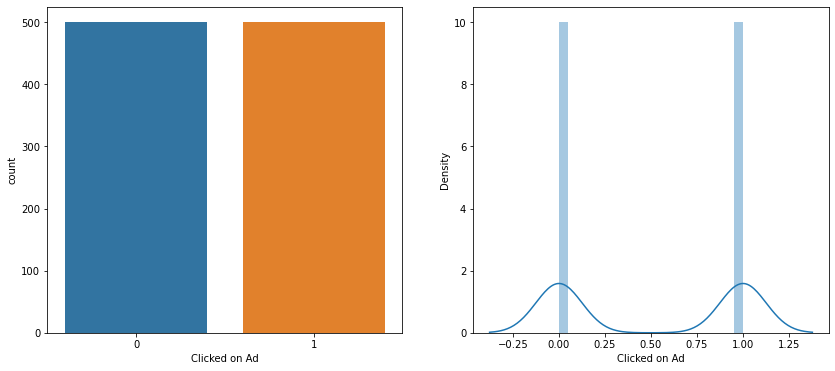

In [19]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = df)
plt.subplot(1,2,2)
sns.distplot(df["Clicked on Ad"], bins = 20)
plt.show()

So from the plot we can see that the number of users who click on a ad and who do not are equal in numbers i.e 500, that makes it very interesting.

In [ ]:
# Jointplot of daily time spent on site and age
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = df) 

 We can see that more people aged between 30 to 40 are spending more time on site daily

#### Distribution and Relationship Between Variables

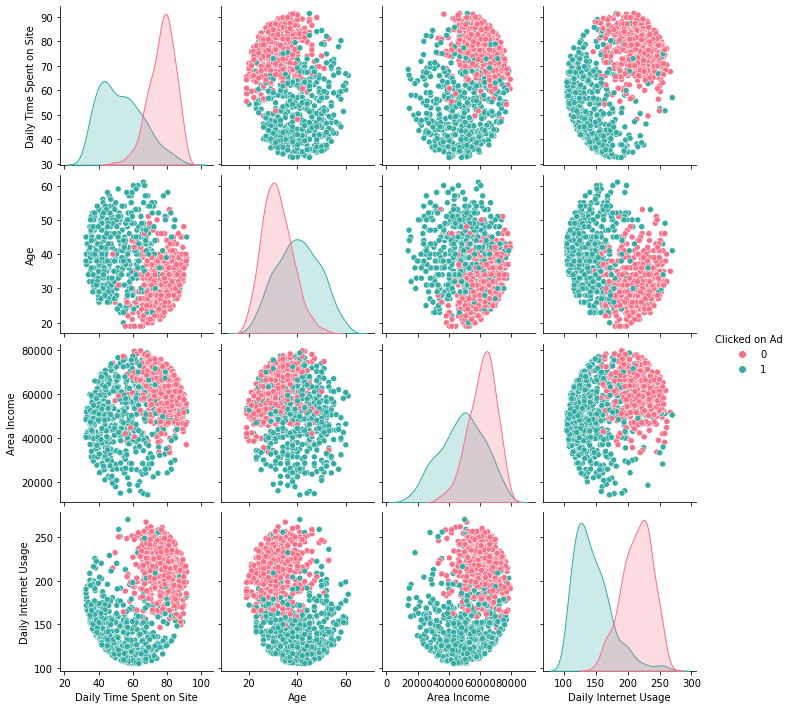

In [21]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'husl')

Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.

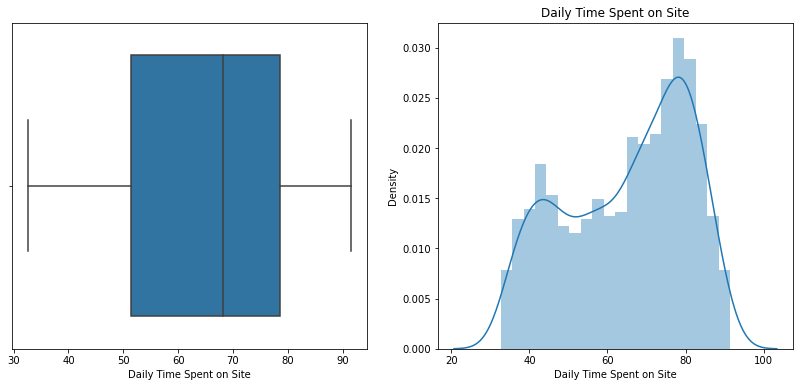

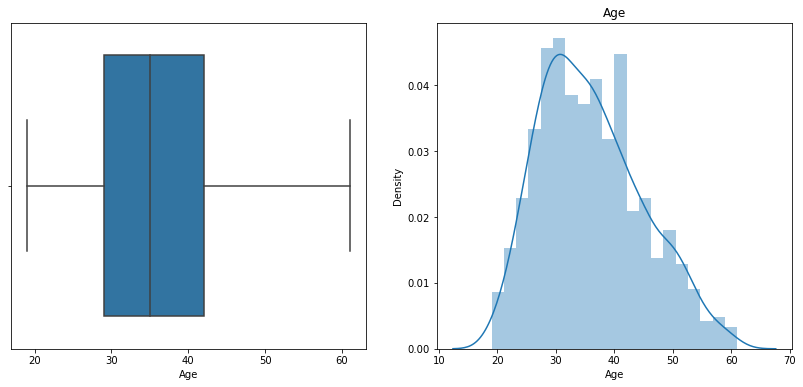

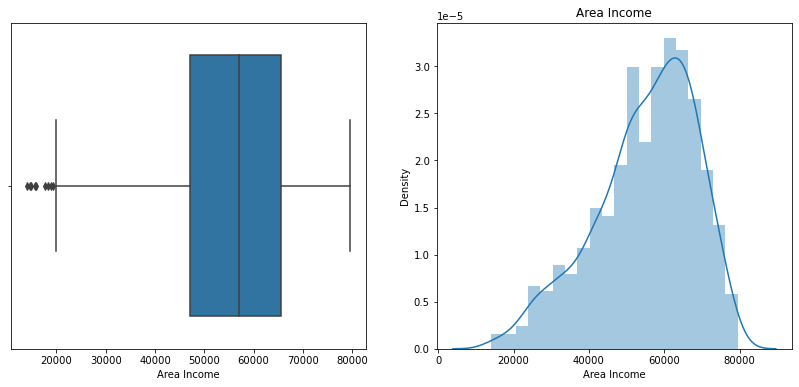

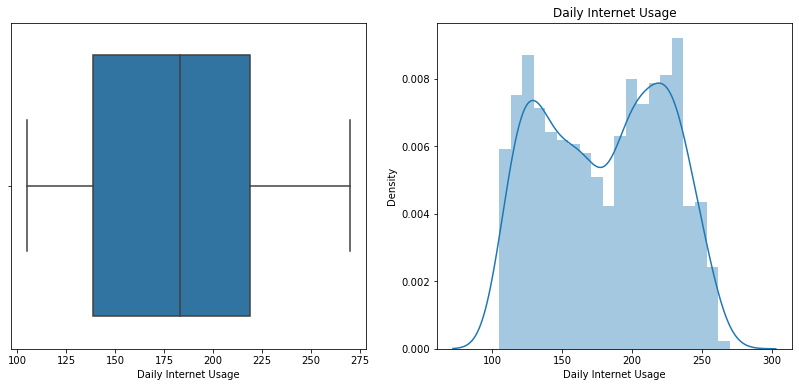

In [22]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[i])
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 20)    
    plt.title(i)    
    plt.show()

We can clearly see that daily interent usage and daily time spent on a site has 2 peaks (Bi-model in statistical terms). It indicates that there are two different groups present in our data. We dont expect the users to be normally distributed as there are people who spend more time on internet/website and people who spend less time. Some regularly use the website and some less often so they are perfectly alright

In [23]:
print('oldest person was of:', df['Age'].max(), 'Years')
print('Youngest person was of:', df['Age'].min(), 'Years')
print('Average age was of:', df['Age'].mean(), 'Years')

oldest person was of: 61 Years
Youngest person was of: 19 Years
Average age was of: 36.009 Years


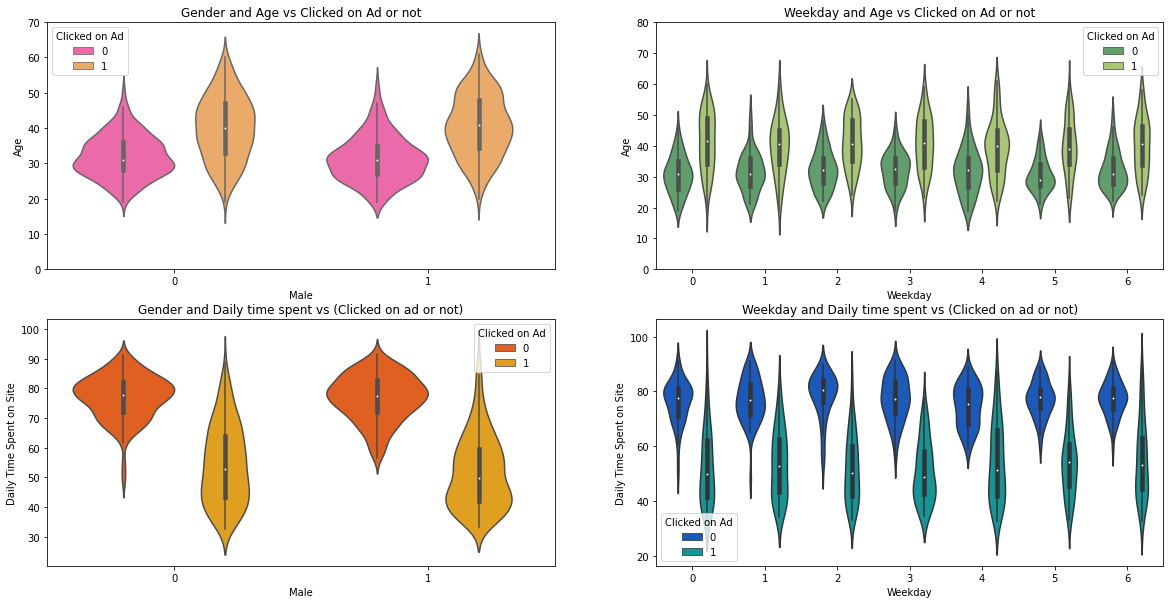

In [24]:
f,ax=plt.subplots(2,2, figsize=(20,10))
sns.violinplot("Male","Age", hue= "Clicked on Ad", data=df,ax=ax[0,0],palette="spring")
ax[0,0].set_title('Gender and Age vs Clicked on Ad or not')
ax[0,0].set_yticks(range(0,80,10))
sns.violinplot("Weekday","Age", hue="Clicked on Ad", data=df,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Weekday and Age vs Clicked on Ad or not')
ax[0,1].set_yticks(range(0,90,10))
sns.violinplot("Male","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('Gender and Daily time spent vs (Clicked on ad or not)')
#ax[1,0].set_yticks(range(0,120,10))
sns.violinplot("Weekday","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,1],palette="winter")
ax[1,1].set_title('Weekday and Daily time spent vs (Clicked on ad or not)')
#ax[1,1].set_yticks(range(0,120,10))
plt.show()

#### Correlation Between Variables

<AxesSubplot:>

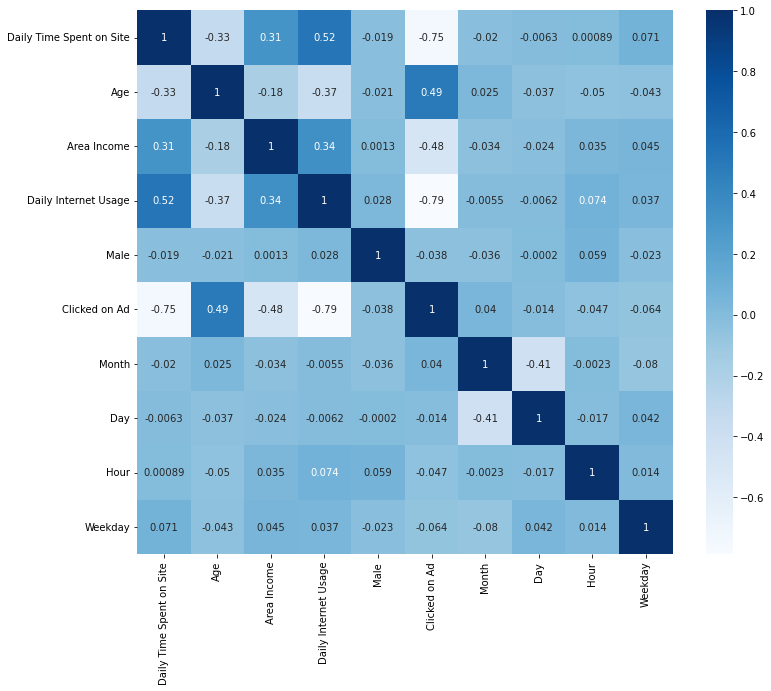

In [25]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='Blues', annot = True) # Degree of relationship i.e correlation using heatmap

Heatmap gives us better understanding of relationship between each feature. Correlation is measured between -1 and 1. Higher the absolute value, higher is the degree of correlation between the variables. We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data.

#### Extracted Features Visualizations¶

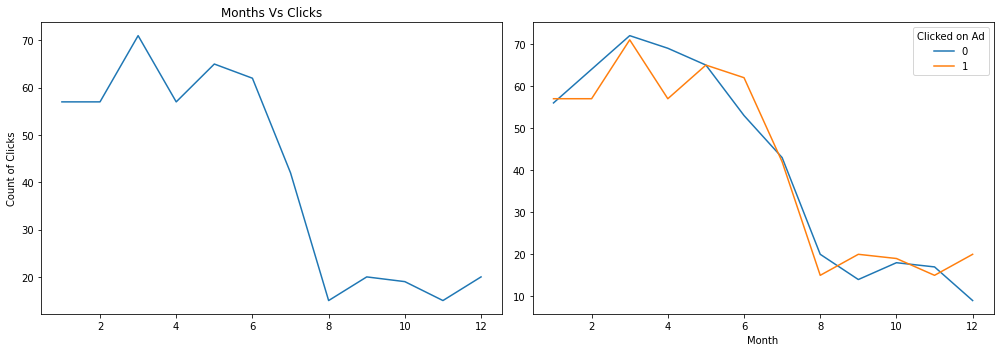

In [28]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"]).T.plot(kind = 'line',ax=ax[1])
#df.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
plt.show()

Line chart showing the count of clicks for each month. Grouped bar chart shows distribution of target variable across 7 months. 2nd Month seems to be the best for clicking on a Ad.

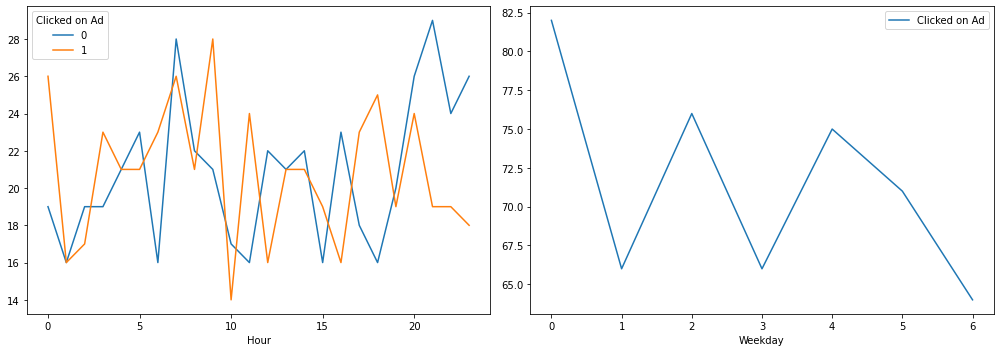

In [29]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'line', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

Line chart here indicates that user tends to click on a Ad later in a day or probably early in the morning. It is expected based on the age feature that most people are working so it seems appropriate as they either find time early or late in the day. Also sunday seems to be effective for clicking on a ad from the bar chart

#### Clicked Vs Not Clicked

In [30]:
df.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


Average profile of a user who will click on a ad or not.

In [32]:
df.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Distribution of clicks by gender. It seems that more number of females have clicked on ad.

In [33]:
hdf = pd.pivot_table(df, index = ['Hour'], columns = ['Male'], values = ['Clicked on Ad'], 
                     aggfunc= np.sum).rename(columns = {'Clicked on Ad':'Clicked'})

cm = sns.light_palette("green", as_cmap=True)
hdf.style.background_gradient(cmap=cm)  # Sums all 1's i.e clicked for each hour

Distribution by each hour and by gender. Overall females tend to click on a Ad more often than males.

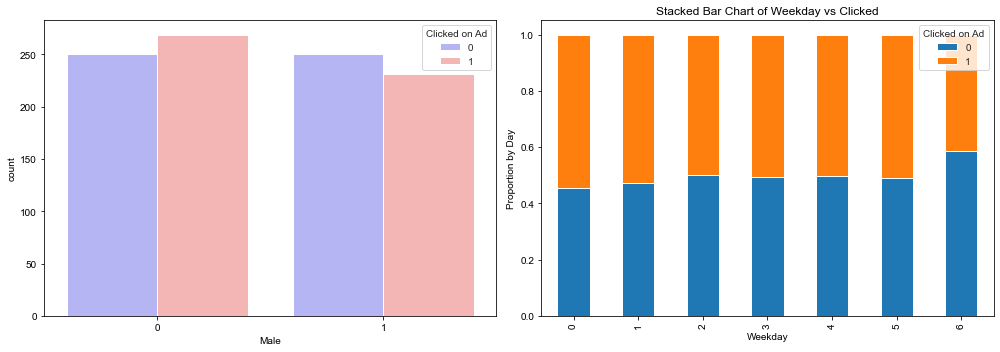

In [34]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='Male',hue='Clicked on Ad',data=df,palette='bwr', ax = ax[0]) # Overall distribution of Males and females count
table = pd.crosstab(df['Weekday'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1], grid = False) # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

From the stacked bar chart it seems that there more chances of user clicking on a ad if its a thursday!

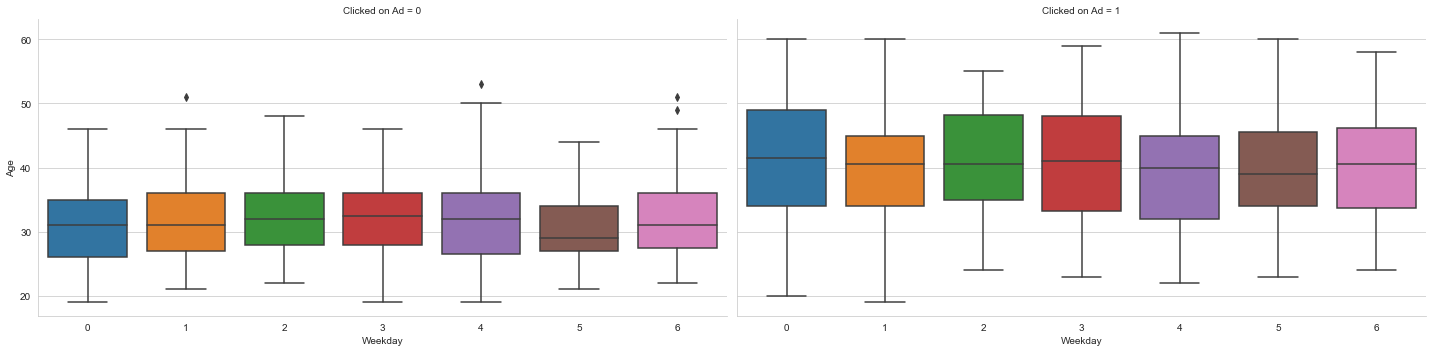

In [35]:
sns.factorplot(x="Weekday", y="Age", col="Clicked on Ad", data=df, kind="box",size=5, aspect=2.0) 

Comparison of users who have clicked on ad or not in terms of age and weekday. It is clear that people with higher age tend to click on a ad.

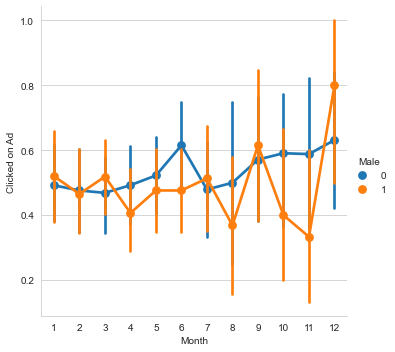

In [36]:
sns.factorplot('Month', 'Clicked on Ad', hue='Male', data = df)
plt.show()

### Identifying Potential Outliers using IQR

In [37]:
for i in numeric_cols:
    stat = df[i].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64
The upper and lower bounds for suspected outliers are 119.32875 and 10.57875.
count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64
The upper and lower bounds for suspected outliers are 61.5 and 9.5.
count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64
The upper and lower bounds for suspected outliers are 93128.88375 and 19373.553750000003.
count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218.79250

#### Basic model building based on the actual data

In [38]:
# Importing train_test_split from sklearn.model_selection family
from sklearn.model_selection import train_test_split

In [39]:
# Assigning Numerical columns to X & y only as model can only take numbers
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [43]:
# Splitting the data into train & test sets 
# test_sivrun99$m1
#size is % of data that we want to allocate & random_state ensures a specific set of random splits on our data because 
#this train test split is going to occur randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# We dont have to use stratify method in train_tst_split to handle class distribution as its not imbalanced and does contain equal number of classes i.e 1's and 0's
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


#### Building a Basic Model

In [44]:
# Import LogisticRegression from sklearn.linear_model family
from sklearn.linear_model import LogisticRegression

In [45]:
# Instantiate an instance of the linear regression model (Creating a linear regression object)
logreg = LogisticRegression()
# Fit the model on training data using a fit method
model = logreg.fit(X_train,y_train)
model

LogisticRegression()

### Predictions

In [46]:
# The predict method just takes X_test as a parameter, which means it just takes the features to draw predictions
predictions = logreg.predict(X_test)
# Below are the results of predicted click on Ads
predictions[0:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

#### Performance Metrics

Now we need to see how far our predictions met the actual test data (y_test) by performing evaluations using classification report & confusion matrix on the target variable and the predictions.

confusion matrix is used to evaluate the model behavior from a matrix. Below is how a confusion matrix looks like:

                Predicted No   Predicted Yes
Actual No          TN                 FP 

Actual Yes         FN                 TP   
TP- True Positive TN- True Negative FP- False Positive FN- False Negative

True Positive is the proportion of positives that are correctly identified. Similarly, True Negative is the proportion of negatives that are correctly identified. False Positive is the condition where we predict a result that is actually doesn't fulfill. Similarly, False Negative is the condition where the prediction failed, when it was actually successful.

If we want to calculate any specific value, we can do it from confusion matrix directly.

classification_report will basically tell us the precision, recall value's accuracy, f1 score & support. This way we don't have to read it ourself from a confusion matrix.

precision is the fraction of retrieved values that are relevant to the data. The precision is the ratio of tp / (tp + fp).

recall is the fraction of successfully retrieved values that are relevant to the data. The recall is the ratio of tp / (tp + fn).

f1-score is the harmonic mean of precision and recall. Where an fscore reaches its best value at 1 and worst score at 0.

support is the number of occurrences of each class in y_test.

In [50]:
# Importing classification_report from sklearn.metrics family
from sklearn.metrics import classification_report

# Printing classification_report to see the results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [51]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[156   6]
 [ 25 143]]


### Results for Basic Model

The results from evaluation are as follows:

Confusion Matrix:

The users that are predicted to click on commercials and the actually clicked users were 144, the people who were predicted not to click on the commercials and actually did not click on them were 156.

The people who were predicted to click on commercial and actually did not click on them are 6, and the users who were not predicted to click on the commercials and actually clicked on them are 24.

We have only a few mislabelled points which is not bad from the given size of the dataset.

Classification Report:

From the report obtained, the precision & recall are 0.91 which depicts the predicted values are 91% accurate. Hence the probability that the user can click on the commercial is 0.91 which is a good precision value to get a good model.

### Feature Engineering

In [53]:
# just to keep the original dataframe unchanged
new_df = df.copy() 

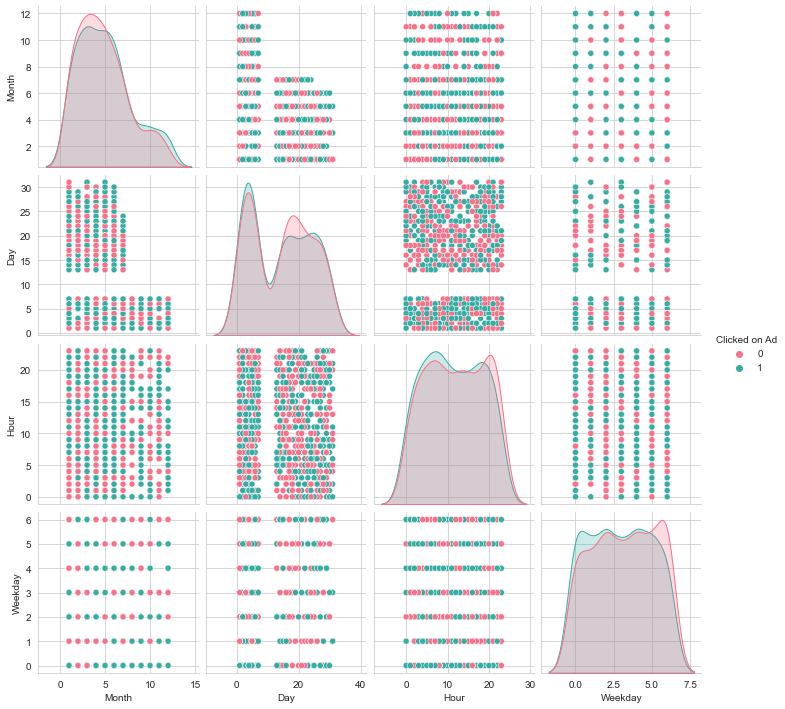

In [54]:
# Creating pairplot to check effect of datetime variables on target variable (variables which were created)
pp = sns.pairplot(new_df, hue= 'Clicked on Ad', vars = ['Month', 'Day', 'Hour', 'Weekday'], palette= 'husl')

There dont seems to be any effect of month, day, weekday and hour on the target variable.

In [55]:
# Dummy encoding on Month column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Month'], prefix='Month')], axis=1) 
# Dummy encoding on weekday column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Weekday'], prefix='Weekday')], axis=1)

In [56]:
# Creating buckets for hour columns based on EDA part
new_df['Hour_bins'] = pd.cut(new_df['Hour'], bins = [0, 5, 11, 17, 23], 
                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [57]:
# Dummy encoding on Hour_bins column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Hour_bins'], prefix='Hour')], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'),
  Text(35, 0, '54'),
  Text(36, 0, '55'),
  Text(37, 0, '56'),
  Text(38, 0, 

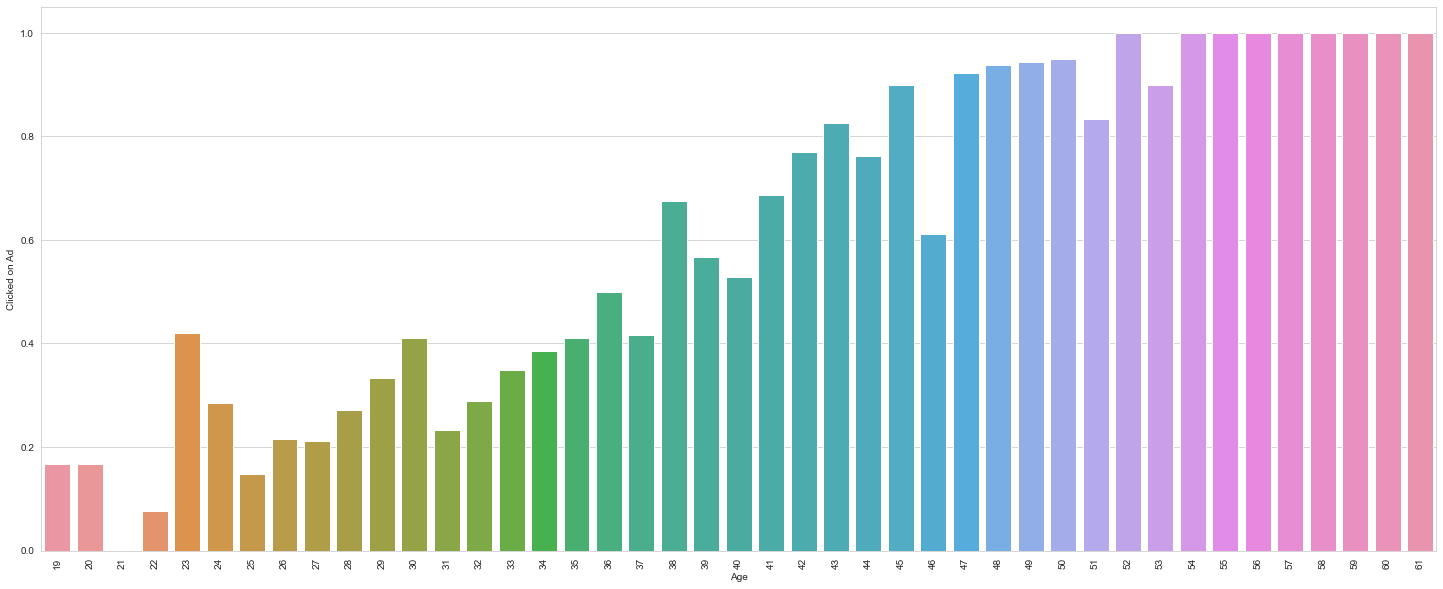

In [58]:
# Feature engineering on Age column
plt.figure(figsize=(25,10))
sns.barplot(new_df['Age'],df['Clicked on Ad'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'),
  Text(35, 0, '54'),
  Text(36, 0, '55'),
  Text(37, 0, '56'),
  Text(38, 0, 

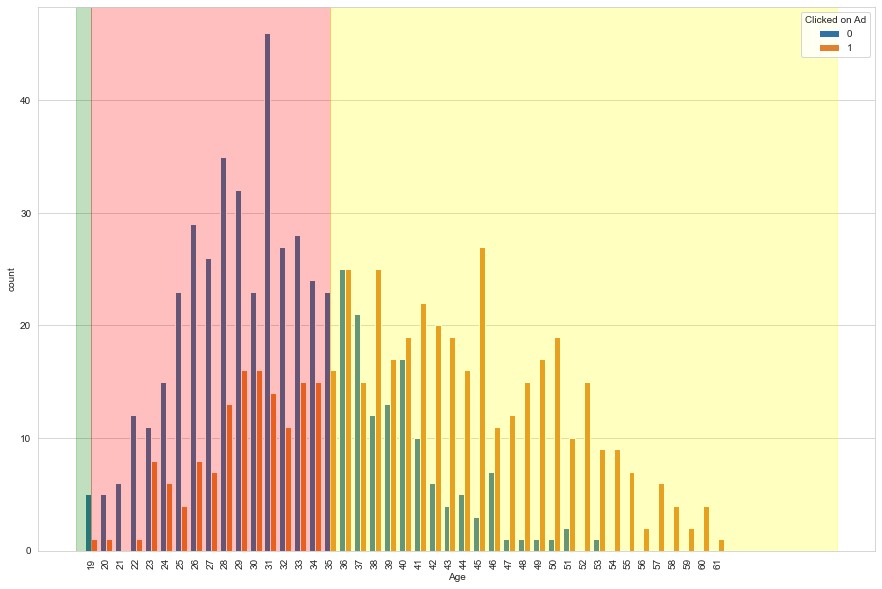

In [59]:
# checking bins
limit_1 = 18
limit_2 = 35

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(15,10))
#sns.barplot(df['age'],df['survival_7_years'], ci=None)
sns.countplot('Age',hue='Clicked on Ad',data=df)
plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 50, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [60]:
# Creating Bins on Age column based on above plots
new_df['Age_bins'] = pd.cut(new_df['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])

<AxesSubplot:xlabel='Age_bins', ylabel='count'>

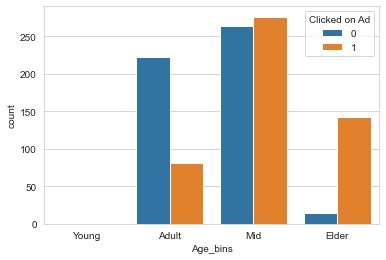

In [63]:
 # Verifying the bins by checking the count
sns.countplot('Age_bins',hue='Clicked on Ad',data= new_df)

In [64]:
# Dummy encoding on Age column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Age_bins'], prefix='Age')], axis=1) 

In [65]:
# Dummy encoding on Column column based on EDA
new_df = pd.concat([new_df, pd.get_dummies(new_df['Country'], prefix='Country')], axis=1)

In [66]:
# Remove redundant and no predictive power features
new_df.drop(['Country', 'Ad Topic Line', 'City', 'Day', 'Month', 'Weekday', 
             'Hour', 'Hour_bins', 'Age', 'Age_bins'], axis = 1, inplace = True)
new_df.head() # Checking the final dataframe

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month_1,Month_2,Month_3,Month_4,Month_5,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,61833.90,256.09,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building Logistic Regression Model

In [67]:
X = new_df.drop(['Clicked on Ad'],1)
y = new_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
# Standarizing the features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 268) (800,)
(200, 268) (200,)


In [69]:
import  statsmodels.api  as sm
from scipy import stats

X2   = sm.add_constant(X_train_std)
est  = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Clicked on Ad   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          9.97e-160
Time:                        22:48:07   Log-Likelihood:                 311.19
No. Observations:                 800   AIC:                            -98.37
Df Residuals:                     538   BIC:                             1129.
Df Model:                         261                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4863      0.007     68.774      0.0

 We can see that the feature Male(Gender) does not contribute to the model (i.e., see x4) so we can actually remove that variable from our model. After removing the variable if the Adjusted R-squared has not changed from the previous model. Then we could conclude that the feature indeed was not contributing to the model. Looks like the contributing features for the model are:

Daily Time Spent on site

Daily Internet Usage

Age

Country

Area income

In [70]:
# Applying logistic regression model to training data
lr = LogisticRegression(penalty="l2", C= 0.1, random_state=42)
lr.fit(X_train_std, y_train)
# Predict using model
lr_training_pred = lr.predict(X_train_std)
lr_training_prediction = accuracy_score(y_train, lr_training_pred)

print( "Accuracy of Logistic regression training set:",   round(lr_training_prediction,3))

Accuracy of Logistic regression training set: 0.992


In [71]:
#Creating K fold Cross-validation 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.950 +/- 0.020


In [ ]:
# from sklearn.model_selection import cross_val_predict
print('The cross validated score for Logistic Regression Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(lr,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

### Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train_std,y_train)
# Predict using model
rf_training_pred = rf.predict(X_train_std)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)

print("Accuracy of Random Forest training set:",   round(rf_training_prediction,3))

Accuracy of Random Forest training set: 0.994


In [74]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.970 +/- 0.014


The cross validated score for Random Forest Classifier is: 97.0


Text(0.5, 1.05, 'Confusion_matrix')

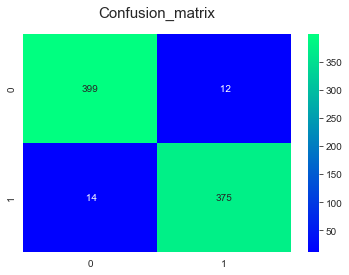

In [75]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Random Forest Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(rf,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

### Test Models Performance

In [76]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test_std))

print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test_std)))

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_std))

print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test_std)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.91
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        89
           1       0.96      0.87      0.92       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200



 ---Random Forest Model---
Random Forest AUC = 0.94
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



We can observe that random forest has higher accuracy compared to logistic regression model in both test and train data sets.

### ROC Graph

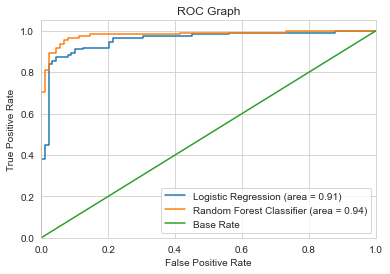

In [77]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_std)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_std)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Feature Importances

In [79]:
# Converting numpy array list into dataframes
columns = X.columns
train = pd.DataFrame(np.atleast_2d(X_train_std), columns=columns) 

In [80]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,Daily Internet Usage,0.349699
1,Daily Time Spent on Site,0.289595
2,Area Income,0.112330
3,Age_Elder,0.036685
4,Age_Adult,0.029323
5,Age_Mid,0.007518
6,Male,0.003477
7,Country_Hungary,0.003218
8,Hour_Hour_18-23,0.002945
9,Hour_Hour_6-11,0.002906


<AxesSubplot:xlabel='importance', ylabel='index'>

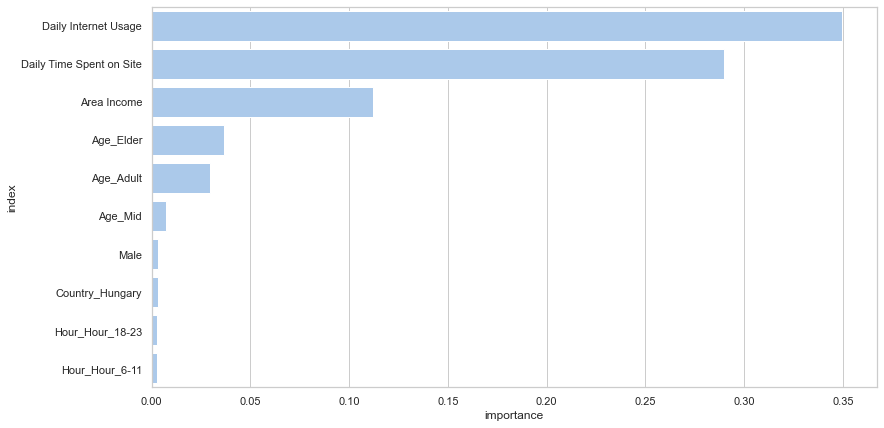

In [81]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[0:10],
            label="Total", color="b")

### Results and conclusion

I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors

Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.

### References 

The work done in this project is inspired from following books and websites:-

1 Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2 Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3 https://en.wikipedia.org/wiki/Random_forest

4 https://www.datacamp.com/community/tutorials/random-forests-classifier-python

5 http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/

6 https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/